In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import matplotlib.animation as animation


city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"
# Read the City and Ride Data
citydata_df= pd.read_csv("data/city_data.csv")
ridedata_df= pd.read_csv("data/ride_data.csv")

full_data=pd.merge(citydata_df,ridedata_df)

full_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [9]:
#group ride data by city
ride_level_data = ridedata_df.groupby(ridedata_df['city'])

# average fare per city
city_avg_fare = ride_level_data.mean().reset_index()

# number of rides per city
city_nbr_rides = ride_level_data.count().reset_index()


In [10]:
#merge average fare data into city dataframe
city_avg_fare = pd.merge(citydata_df, city_avg_fare, on='city', how='left')


In [11]:
city_avg_fare.head()


,city,driver_count,type,fare,ride_id
0,Richardfort,38,Urban,22.373214,4.805922e+12
1,Williamsstad,59,Urban,24.362174,4.316939e+12
2,Port Angela,67,Urban,23.836842,5.203415e+12
3,Rodneyfort,34,Urban,28.616957,4.973479e+12
4,West Robert,39,Urban,25.123871,4.575476e+12


In [13]:

city_avg_fare_renamed = city_avg_fare.rename(columns={"fare": "average_fare"})

#reorganize data set
citydata_avg_fare_work = city_avg_fare_renamed[['city', 'driver_count', 'type', 'average_fare']]


In [26]:
#merge average fare and ride
citydata_with_nbr_rides = pd.merge(citydata_avg_fare_work, city_nbr_rides, on='city', how='left')


citydata_with_nbr_rides.head()

,city,driver_count,type,average_fare,date,fare,ride_id
0,Richardfort,38,Urban,22.373214,28,28,28
1,Williamsstad,59,Urban,24.362174,23,23,23
2,Port Angela,67,Urban,23.836842,19,19,19
3,Rodneyfort,34,Urban,28.616957,23,23,23
4,West Robert,39,Urban,25.123871,31,31,31


In [27]:

citydata_nbr_rides_renamed = citydata_with_nbr_rides.rename(columns={"ride_id": "nbr_rides"})

#reorganize data set
citydata_work = citydata_nbr_rides_renamed[['city', 'driver_count', 'type', 'average_fare', 'nbr_rides']]


In [28]:

citydata_urban = citydata_work.loc[citydata_work['type'] == 'Urban']


citydata_suburban = citydata_work.loc[citydata_work['type'] == 'Suburban']


citydata_rural = citydata_work.loc[citydata_work['type'] == 'Rural']


## Bubble Plot of Ride Sharing Data

/Users/kristenbroersma/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/kristenbroersma/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


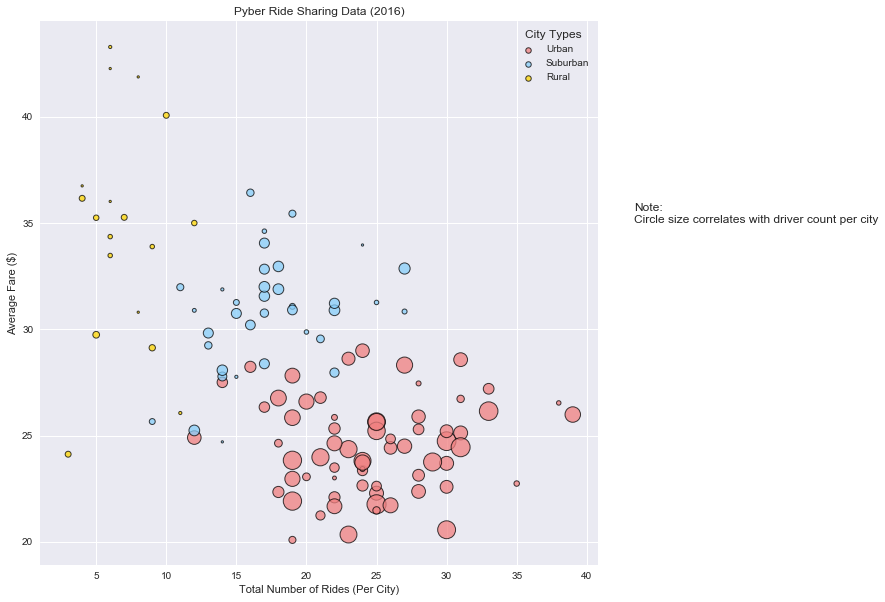

In [57]:

#bubble chart
fig = plt.figure(figsize=(10,10))
axis1 = fig.add_subplot(111)
axis2 = fig.add_subplot(111)
axis3 = fig.add_subplot(111)


# scatter plots for each city types
axis1.scatter(citydata_urban['nbr_rides'],citydata_urban['average_fare'], 
                        (citydata_urban['driver_count']*5),facecolors='lightcoral', edgecolors='black', alpha=0.75,
                        label='Urban',linewidth=1.0)
axis2.scatter(citydata_suburban['nbr_rides'],citydata_suburban['average_fare'], 
                        (citydata_suburban['driver_count']*5),facecolors='lightskyblue', edgecolors='black',
                        alpha=0.75,label='Suburban',linewidth=1.0)
axis3.scatter(citydata_rural['nbr_rides'],citydata_rural['average_fare'], 
                        (citydata_rural['driver_count']*5),facecolors='gold', edgecolors='black',
                        alpha=0.75,label='Rural',linewidth=1.0)



# labels and legend
textstr = 'Note:\nCircle size correlates with driver count per city'
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride Sharing Data (2016)')
plt.figtext(.95, .60, textstr)
lgnd = plt.legend(loc='best', title = 'City Types')
for handle in lgnd.legendHandles:
    handle.set_sizes([30.0])
    

plt.show()

## Total Fares by City Type

In [37]:
colors = ['gold', 'lightskyblue', 'lightcoral']
ridedata_fare = ridedata_df[['city', 'fare']]

cityfare_driver= pd.merge(citydata_df, ridedata_fare, on='city', how='left')



In [45]:
#group data 
totalfare_drivers_by_city= cityfare_driver.groupby(cityfare_driver['type']).sum().reset_index()


citylabels = totalfare_drivers_by_city['type']

#total fares for pie slice
totalarea_fares = totalfare_drivers_by_city['fare']

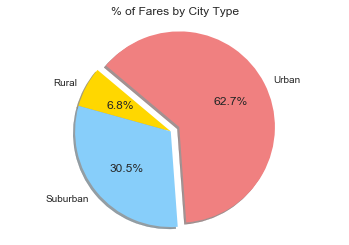

In [46]:

explode = (0, 0, 0.1)

#chart
plt.title('% of Fares by City Type')

plt.pie(totalarea_fares, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)


plt.axis('equal')


plt.show()

## Total Rides by City Type

In [49]:

nbr_rides_per_city = city_nbr_rides[['city', 'ride_id']].copy()

#city and city type from the citydata dataframe
city_types = citydata_df[['city', 'type']]

rides_by_citymerged = pd.merge(city_types, nbr_rides_per_city, on='city', how='left')
totalrides_bycity_merged = rides_by_citymerged.rename(columns = {"ride_id": "nbr_rides"})

total_rides_bycity = totalrides_bycity_merged.groupby(totalrides_bycity_merged['type']).sum().reset_index()
total_rides_bycity

,type,nbr_rides
0,Rural,125
1,Suburban,625
2,Urban,1625


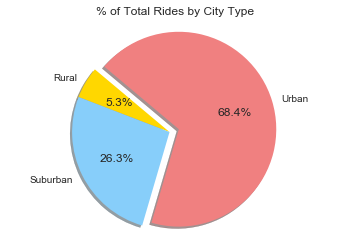

In [52]:

ride_labels = total_rides_bycity['type']

total_rides = total_rides_bycity['nbr_rides']

explode = (0, 0, 0.1)

plt.title('% of Total Rides by City Type')

plt.pie(total_rides, explode=explode, labels=ride_labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis('equal')

plt.show()

## Total Drivers by City Type

In [56]:
total_drivers = city_labels['driver_count']


explode = (0, 0, 0.1)

plt.title('% of Total Drivers by City Type')

plt.pie(total_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)


plt.axis('equal')


plt.show()

NameError: name 'city_labels' is not defined

In [ ]:
# Show Figure
plt.show()